In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from utils import check_null_values, staff_hours_per_person

In [53]:
nursing_df = pd.read_csv('all_nurse_df.csv')
nursing_df.head()

c:\users\hua13\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,day,day_name,is_weekend,is_holiday_week,IsEnsign,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,2020-10-01,52,0.00,...,1,Thursday,False,False,False,5.00,0.15,4.85,0.14,4.86
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,2020-10-02,52,0.13,...,2,Friday,False,False,False,4.89,0.28,4.60,0.15,4.74
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,2020-10-03,52,0.00,...,3,Saturday,True,False,False,3.47,0.00,3.47,0.00,3.47
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,2020-10-04,51,0.00,...,4,Sunday,True,False,False,3.08,0.00,3.08,0.15,2.94
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2020Q4,2020-10-05,51,0.16,...,5,Monday,False,False,False,5.36,0.33,5.03,0.23,5.13


In [54]:
ensign_nurse_df = pd.read_csv('ensign_nurse_df.csv')
ensign_nurse_df.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,day,day_name,is_weekend,is_holiday_week,IsEnsign,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr
0,35297,SURPRISE HEALTH AND REHABILITATION CENTER,SURPRISE,AZ,Maricopa,13,2020Q4,2020-10-01,78,0.10,...,1,Thursday,False,False,True,5.14,0.41,4.73,0.46,4.68
1,35297,SURPRISE HEALTH AND REHABILITATION CENTER,SURPRISE,AZ,Maricopa,13,2020Q4,2020-10-02,72,0.11,...,2,Friday,False,False,True,5.70,0.44,5.26,0.65,5.06
2,35297,SURPRISE HEALTH AND REHABILITATION CENTER,SURPRISE,AZ,Maricopa,13,2020Q4,2020-10-03,72,0.00,...,3,Saturday,True,False,True,4.54,0.00,4.54,0.81,3.73
3,35297,SURPRISE HEALTH AND REHABILITATION CENTER,SURPRISE,AZ,Maricopa,13,2020Q4,2020-10-04,75,0.00,...,4,Sunday,True,False,True,4.06,0.00,4.06,0.57,3.49
4,35297,SURPRISE HEALTH AND REHABILITATION CENTER,SURPRISE,AZ,Maricopa,13,2020Q4,2020-10-05,73,0.11,...,5,Monday,False,False,True,5.00,0.44,4.56,0.22,4.78


In [4]:
nursing_df.columns

Index(['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS',
       'CY_Qtr', 'WorkDate', 'MDScensus', 'year', 'month', 'day', 'day_name',
       'is_weekend', 'is_holiday_week', 'IsEnsign', 'total_hours',
       'total_admin_hours', 'total_non_admin', 'total_ctr_hours',
       'total_non_ctr'],
      dtype='object')

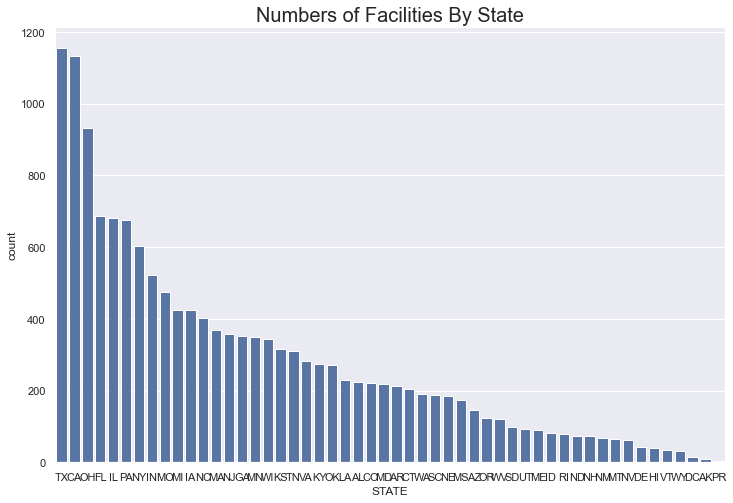

In [37]:
nursing_facilities_df = nursing_df.groupby('PROVNUM').first()
ax = sns.countplot(x="STATE", data=nursing_facilities_df, color='b',
                   order = nursing_facilities_df['STATE'].value_counts().index)
ax.set_title('Numbers of Facilities By State', fontsize=20);

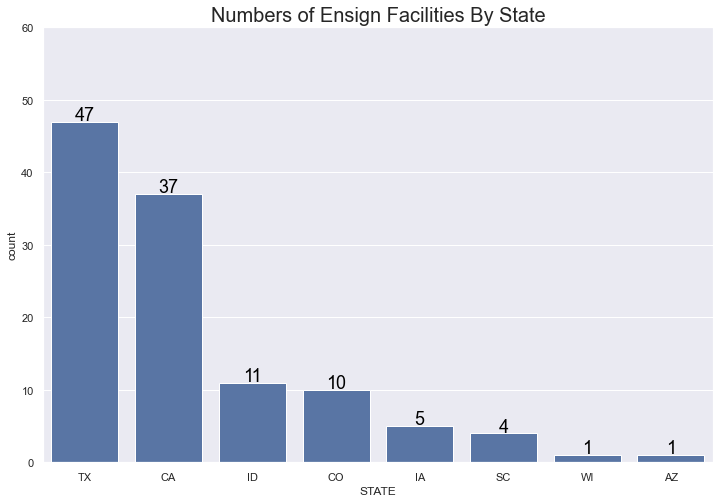

In [38]:
ensign_facility_df = ensign_nurse_df.groupby('PROVNUM').first()
sns.set(rc={"figure.figsize":(12, 8)})
ax = sns.countplot(x="STATE", data=ensign_facility_df, color='b',
                   order = ensign_facility_df['STATE'].value_counts().index)
ax.set_title('Numbers of Ensign Facilities By State', fontsize=20)
ax.set(ylim=(0, 60))
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height() + 5.0), ha='center', va='top', color='black', size=18)

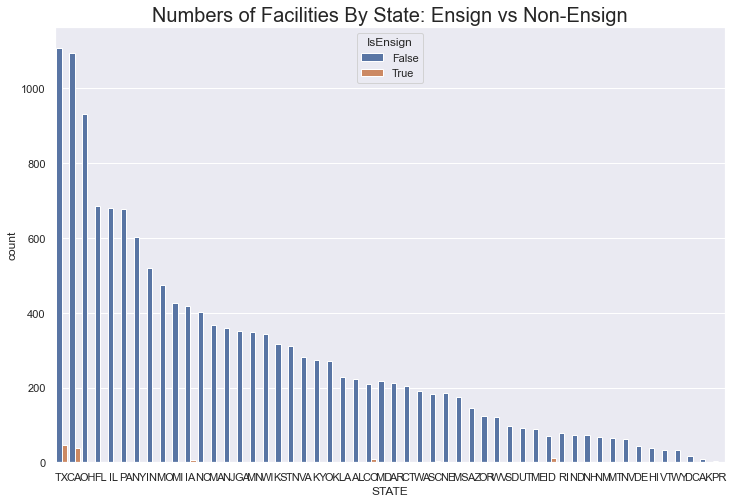

In [39]:
nursing_facilities_df = nursing_df.groupby('PROVNUM').first()
ax = sns.countplot(x="STATE", data=nursing_facilities_df, hue='IsEnsign',
                   order = nursing_facilities_df['STATE'].value_counts().index)
ax.set_title('Numbers of Facilities By State: Ensign vs Non-Ensign', fontsize=20);

In [18]:
features = ['total_hours', 'total_admin_hours', 'total_non_admin', 'total_ctr_hours', 'total_non_ctr', 'Hrs_NAtrn']

In [42]:
nursing_df[features].describe()

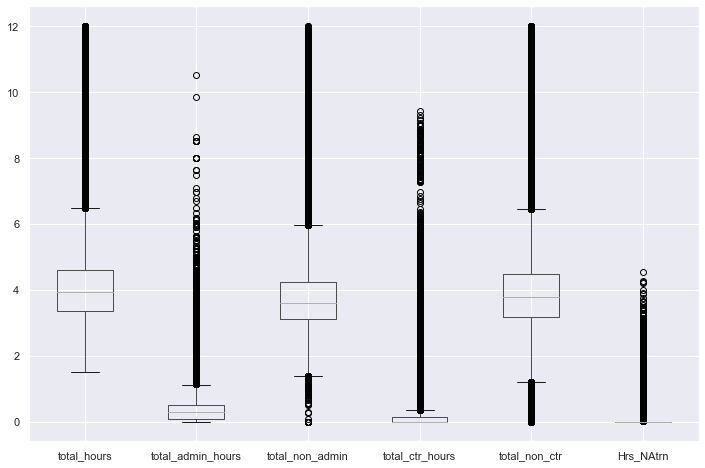

In [44]:
boxplot = nursing_df.boxplot(column=features)

In [33]:
ensign_nurse_df[features].describe()

,total_hours,total_admin_hours,total_non_admin,total_ctr_hours,total_non_ctr,Hrs_NAtrn
count,10671.000000,10671.000000,10671.000000,10671.000000,10671.000000,10671.000000
mean,3.871093,0.329167,3.541933,0.042708,3.828398,0.164799
std,0.902984,0.259676,0.809527,0.139311,0.900379,0.292444
min,1.670000,0.000000,1.630000,0.000000,1.500000,0.000000
25%,3.270000,0.100000,2.980000,0.000000,3.240000,0.000000
50%,3.770000,0.330000,3.450000,0.000000,3.730000,0.000000
75%,4.300000,0.480000,3.940000,0.000000,4.270000,0.220000
max,10.080000,1.960000,8.810000,1.620000,10.080000,2.150000


<AxesSubplot:>

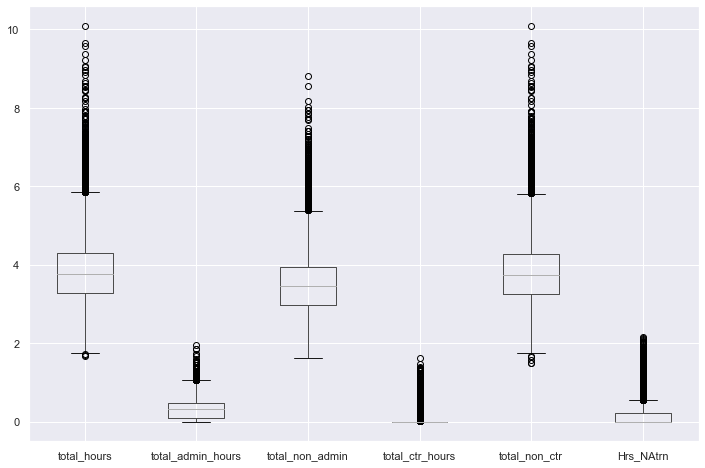

In [45]:
ensign_nurse_df.boxplot(column=features)

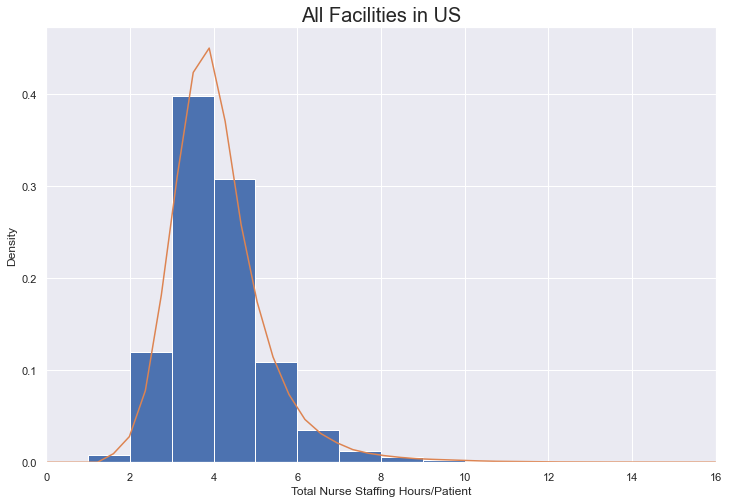

In [29]:
sns.set(rc={"figure.figsize":(12, 8)})
ax = nursing_df['total_hours'].plot.hist(density=True, xlim=[0,16], bins=range(1,16))
nursing_df['total_hours'].plot.density(ax=ax)
ax.set_xlabel('Total Nurse Staffing Hours/Patient')
ax.set_title('All Facilities in US', fontsize=20);

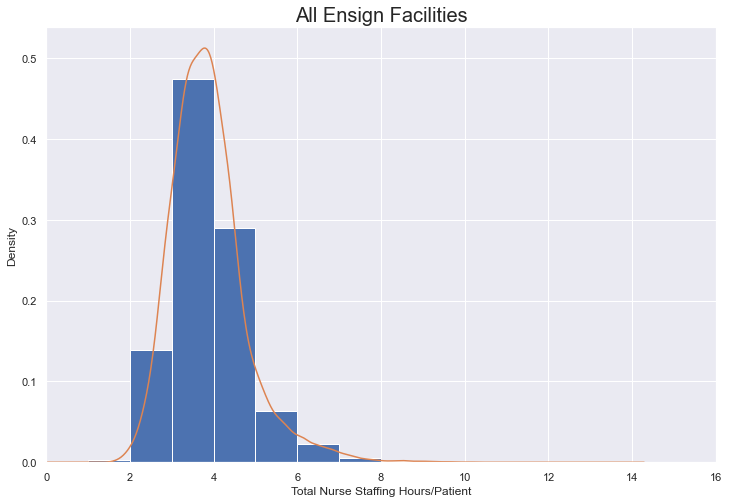

In [30]:
sns.set(rc={"figure.figsize":(12, 8)})
ax = ensign_nurse_df['total_hours'].plot.hist(density=True, xlim=[0,16], bins=range(1,16))
ensign_nurse_df['total_hours'].plot.density(ax=ax)
ax.set_xlabel('Total Nurse Staffing Hours/Patient');
ax.set_title('All Ensign Facilities', fontsize=20);

In [51]:
def plot_hours_per_patient(df1, df2, staff_type):
    plt.rcParams["figure.figsize"] = [12, 6]
    plt.rcParams["figure.autolayout"] = True
#     f, axes = plt.subplots(1, 2)
    ax1 = plt.subplot(1, 2, 1)
    sns.kdeplot(data=df1, x=staff_type)
    ax1.set_title('USA')
    ax2 = plt.subplot(1, 2, 2)
    sns.kdeplot(data=df2, x=staff_type)
    ax2.set_title('Ensign')

    plt.show()

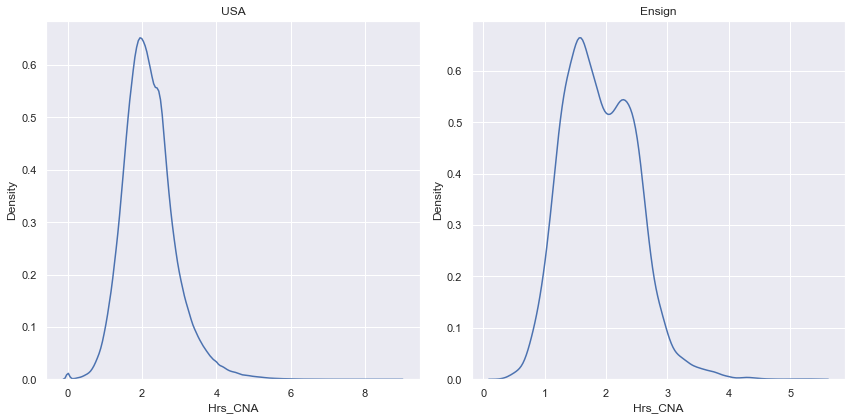

In [55]:
plot_hours_per_patient(nursing_df, ensign_nurse_df, 'Hrs_CNA')